In [28]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [29]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final(10).csv"))

In [30]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,kitchen,ac,balcony,parking,furnish
0,1645136.35,9.9,1,1,0,3.783407,0,0,1,0,0
1,1646078.72,12.4,2,1,0,8.297627,0,1,1,0,0
2,1658431.06,14.9,1,1,0,3.601562,0,1,0,1,0
3,1694781.66,22.3,1,1,0,7.930386,1,1,0,0,0
4,1700025.47,11.2,1,1,0,3.443001,0,0,1,0,0


In [31]:
housing.shape

(1635, 11)

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1635 non-null   float64
 1   area            1635 non-null   float64
 2   bedrooms        1635 non-null   int64  
 3   bathrooms       1635 non-null   int64  
 4   washingmachine  1635 non-null   int64  
 5   dtcenter        1635 non-null   float64
 6   kitchen         1635 non-null   int64  
 7   ac              1635 non-null   int64  
 8   balcony         1635 non-null   int64  
 9   parking         1635 non-null   int64  
 10  furnish         1635 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 140.6 KB


In [33]:
# outlier treatment for area
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [34]:
# outlier treatment for price
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [35]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'balcony', 'parking', 'furnish']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
y_train = df_train.pop('price')
X_train = df_train

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-0.23335281528069002
[ 0.62663942  0.02096313  0.23556449  0.05718171 -0.20251943  0.07308011
  0.0863063   0.1378368   0.11366734  0.04161764]


In [40]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [41]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()

print(model_2.params)

const   -0.383237
x1       1.241318
x2       0.212899
x3      -0.081610
x4       0.012930
           ...   
x61      0.003532
x62      0.011354
x63     -0.107779
x64      0.003505
x65      0.002874
Length: 66, dtype: float64


In [42]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1105.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                        0.00
Time:                        10:13:40   Log-Likelihood:                          664.50
No. Observations:                1099   AIC:                                     -1309.
Df Residuals:                    1089   BIC:                                     -1259.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,kitchen,8.74
2,bathrooms,7.84
6,ac,6.90
7,balcony,5.27
8,parking,4.10
0,area,3.92
3,washingmachine,2.64
9,furnish,2.56
4,dtcenter,2.15
1,bedrooms,1.30


In [44]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     63.34
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          8.11e-307
Time:                        10:13:42   Log-Likelihood:                 969.88
No. Observations:                1099   AIC:                            -1814.
Df Residuals:                    1036   BIC:                            -1499.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3832      0.103     -3.737      0.0

In [45]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'furnish', 'balcony', 'parking', 'furnish']

In [47]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [48]:
y_test = df_test.pop('price')
X_test = df_test

In [49]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)

In [50]:
def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 120, 'bedrooms': 3, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 2, 'dtrec': 1,
     'dthospital': 3, 'kitchen': 1, 'ac': 1, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]   

predictions = predict_prices_with_polynomial_model(model_2, polynomial_features, num_vars[1:], new_data_dict_list)
print("Predicted Prices:", predictions)


KeyError: 'balcony'

In [51]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [52]:
# Making predictions
y_pred = lm.predict(X_test)

In [53]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6219251272662156

In [54]:
r2_score(y_test,y_pred_2)

0.7361107942689389

Text(0, 0.5, 'y_pred')

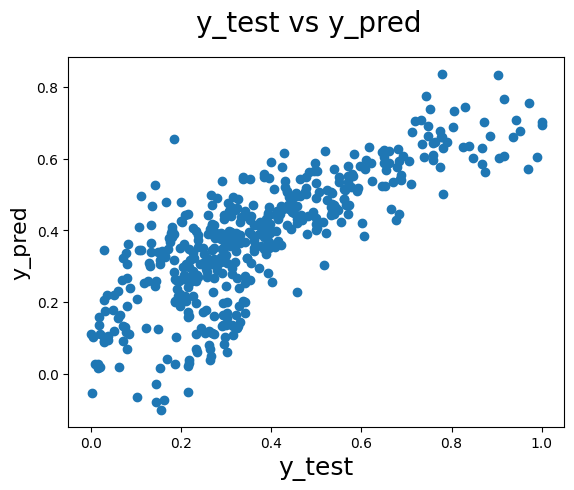

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_2')

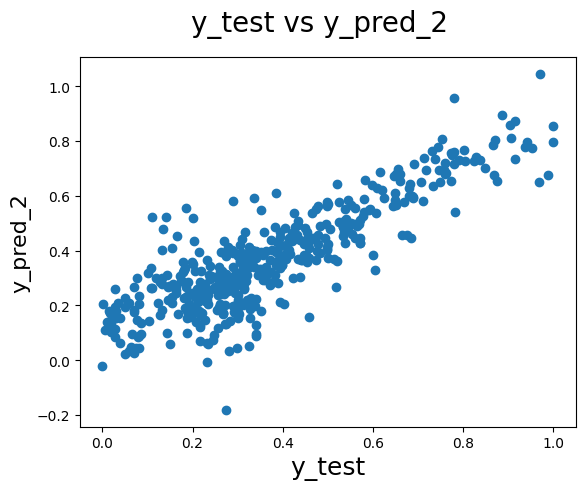

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred_2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_2', fontsize=16)                          # Y-label